In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))
from utils.data_process import data_process
# change the data path to the path of the data
q_gonality_same, q_gonality_diff = data_process(data_path='/home/zxmath/ML-LLM-Q-Gonality-Modular-Curves/data/combined_data_7.h5')

q_gonality_same.head()

# note we don't drop duplicate yet


df.shape (342326, 22)


/home/zxmath/ML-LLM-Q-Gonality-Modular-Curves/notebooks/../src/utils/data_process.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_gonality_same['q_gonality']= q_gonality_same['q_gonality_bounds'].map(lambda b: b[0])


,id,level,nu2,nu3,psl2index,qbar_gonality,has_obstruction,pointless,cusps,rational_cusps,...,contains_negative_one,level_is_squarefree,genus_minus_rank,q_gonality_bounds,rank,canonical_conjugator_0,canonical_conjugator_1,canonical_conjugator_2,canonical_conjugator_3,q_gonality
36,36,11,0,0,60,2.0,-1,False,10,0,...,False,True,1.0,"[2, 2]",0.0,0,1,10,10,2
82,82,15,0,0,36,2.0,-1,False,4,2,...,False,True,2.0,"[2, 2]",0.0,4,14,0,13,2
96,96,12,0,0,18,2.0,-1,False,3,3,...,False,False,1.0,"[2, 2]",0.0,5,1,9,10,2
99,99,27,0,0,36,3.0,-1,False,2,2,...,False,False,2.0,"[3, 3]",1.0,14,0,13,25,3
107,107,12,0,0,6,2.0,-1,False,1,1,...,False,False,1.0,"[2, 2]",0.0,5,4,0,1,2


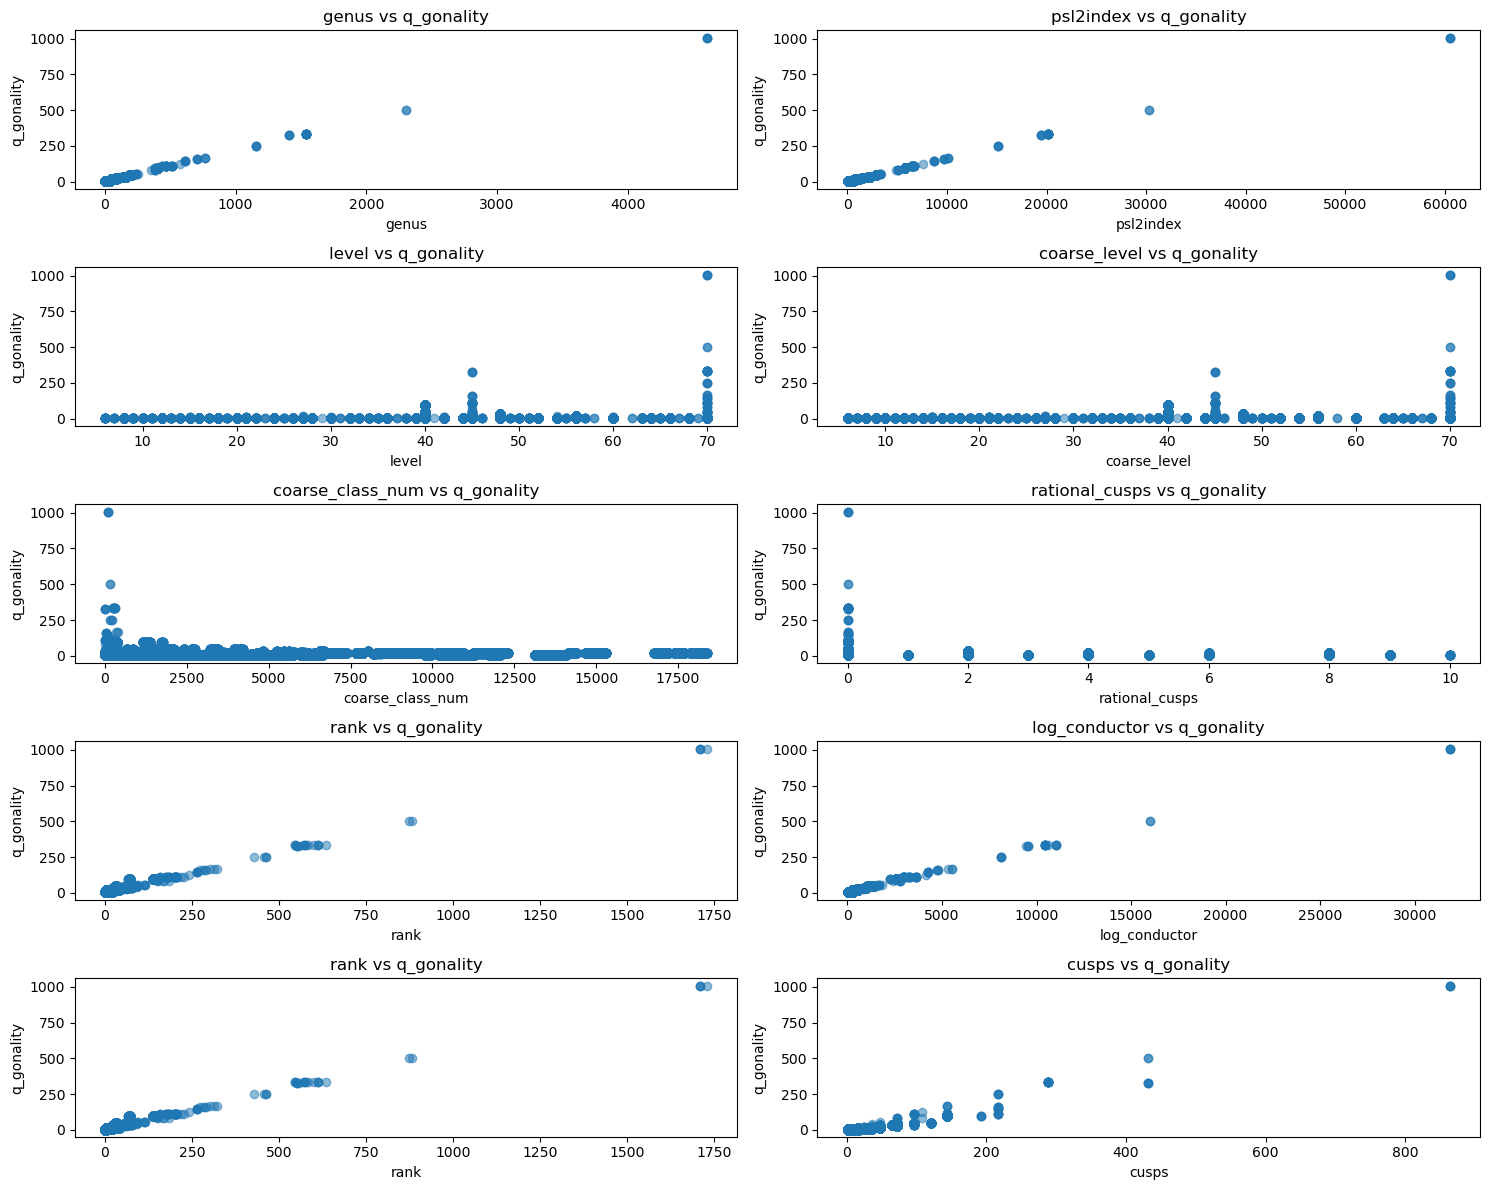

In [2]:
# plot graph between features vs q_gonality
test_features = ['genus','psl2index','level','coarse_level','coarse_class_num',
'rational_cusps','rank', 'log_conductor', 'rank', 'cusps'
]
# plot 3 by 3 graph of features vs q_gonality

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(test_features):
    if i < len(axes):
        axes[i].scatter(q_gonality_same[feature], q_gonality_same['q_gonality'], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('q_gonality')
        axes[i].set_title(f'{feature} vs q_gonality')

# Hide any unused subplots
for i in range(len(test_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()




In [4]:
# check test_features whether can uniquely determine q_gonality in dataset

test_features = ['level','coarse_level','coarse_class_num',
'rational_cusps','rank','log_conductor','cusps','genus'
]

# check if test_features can uniquely determine q_gonality

for feature in test_features:
    print(f"{feature}: {q_gonality_same[feature].nunique()}")

# check if test_features can uniquely determine q_gonality  
unique_combinations = q_gonality_same.groupby(test_features)['q_gonality'].nunique()
non_unique = unique_combinations[unique_combinations > 1]

print(f"Total unique combinations of features: {len(unique_combinations)}")
print(f"Combinations that don't uniquely determine q_gonality: {len(non_unique)}")

if len(non_unique) > 0:
    print("\nNon-unique combinations:")
    for idx, count in non_unique.items():
        print(f"Features {idx}: {count} different q_gonality values")
else:
    print("All feature combinations uniquely determine q_gonality!")



level: 60
coarse_level: 56
coarse_class_num: 12375
rational_cusps: 10
rank: 138
log_conductor: 4416
cusps: 31
genus: 65
Total unique combinations of features: 40460
Combinations that don't uniquely determine q_gonality: 0
All feature combinations uniquely determine q_gonality!


In [3]:
features = ['level', 'genus', 'rank', 'cusps', 'rational_cusps', 'log_conductor', 'coarse_class_num','coarse_level']
#create train and test dataset 
q_gonality_same.drop_duplicates(subset=['level','coarse_level','coarse_class_num',
'rational_cusps','rank','log_conductor','cusps','genus','q_gonality'], inplace=True)   

q_gonality_diff.drop_duplicates(subset=['level','coarse_level','coarse_class_num',
'rational_cusps','rank','log_conductor','cusps','genus'], inplace=True)   


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(q_gonality_same.drop(columns=['q_gonality']), q_gonality_same['q_gonality'], test_size=0.1, random_state=42)


import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from models.Tree_model import model_tree
from src import evaluation










/home/zxmath/miniconda3/envs/lmfdb/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [4]:
# test on linear models to predict q_gonality 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train[features], y_train)

y_pred = linear_model.predict(X_test[features])
y_pred_bounds = linear_model.predict(q_gonality_diff[features])

evaluation.compute_r2_and_accuracy(y_test, y_pred)
evaluation.compute_accuracy_in_bounds(y_pred_bounds, q_gonality_diff['q_gonality_bounds'])






R^2: 0.9861
Accuracy: 0.00%
RMSE: 1.0473
Accuracy within bounds: 58.47%


0.5846551724137931

In [22]:
# use features looks linear with q_gonality to predict q_gonality one by one

linear_features = ['rank','psl2index','genus','log_conductor']

for feature in linear_features:
    linear_model = LinearRegression()
    linear_model.fit(X_train[[feature]], y_train)
    y_pred = linear_model.predict(X_test[[feature]])
    y_pred_bounds = linear_model.predict(q_gonality_diff[[feature]])
    print('--------------------------------')
    print(f'Feature: {feature}')
    print(f'Accuracy: {evaluation.compute_r2_and_accuracy(y_test, y_pred)}')
    print(f"Accuracy in bounds: {evaluation.compute_accuracy_in_bounds(y_pred_bounds, q_gonality_diff['q_gonality_bounds'])}")
    print('--------------------------------')





--------------------------------
Feature: rank
R^2: 0.9202
Accuracy: 0.00%
RMSE: 2.4871
Accuracy: (0.9201534968746573, 0.0, 2.487057476836429)
Accuracy within bounds: 39.52%
Accuracy in bounds: 0.39517241379310347
--------------------------------
--------------------------------
Feature: psl2index
R^2: 0.9682
Accuracy: 0.00%
RMSE: 1.6382
Accuracy: (0.9681595724527676, 0.0, 1.6381970870301452)
Accuracy within bounds: 15.74%
Accuracy in bounds: 0.15741379310344827
--------------------------------
--------------------------------
Feature: genus
R^2: 0.9658
Accuracy: 0.00%
RMSE: 1.6665
Accuracy: (0.9657714567338264, 0.0, 1.6664997672051116)
Accuracy within bounds: 10.64%
Accuracy in bounds: 0.10637931034482759
--------------------------------
--------------------------------
Feature: log_conductor
R^2: 0.9630
Accuracy: 0.00%
RMSE: 1.6882
Accuracy: (0.9629771076900783, 0.0, 1.6881819761523593)
Accuracy within bounds: 26.97%
Accuracy in bounds: 0.2696551724137931
----------------------------